# Clothes Fitting Prediction

## Author: Spriha Ghosh

![ChessUrl](https://thumbs.gfycat.com/PerfumedImmaterialBee-size_restricted.gif "chess")



In [1]:
# Regular EDA (exploratory data analysis) and plotting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv("final_test.csv")

In [3]:
dataset.head()

,weight,age,height,size
0,62,28.0,172.72,XL
1,59,36.0,167.64,L
2,61,34.0,165.10,M
3,65,27.0,175.26,L
4,62,45.0,172.72,M


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119734 entries, 0 to 119733
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   weight  119734 non-null  int64  
 1   age     119477 non-null  float64
 2   height  119404 non-null  float64
 3   size    119734 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 3.7+ MB


In [6]:
dataset.describe()

,weight,age,height
count,119734.000000,119477.000000,119404.000000
mean,61.756811,34.027311,165.805794
std,9.944863,8.149447,6.737651
min,22.000000,0.000000,137.160000
25%,55.000000,29.000000,160.020000
50%,61.000000,32.000000,165.100000
75%,67.000000,37.000000,170.180000
max,136.000000,117.000000,193.040000


In [7]:
# Number of occurences for each size (target variable)
dataset["size"].value_counts()

M       29712
S       21924
XXXL    21359
XL      19119
L       17587
XXS      9964
XXL        69
Name: size, dtype: int64

<AxesSubplot:xlabel='size', ylabel='count'>

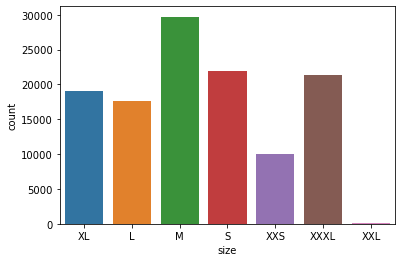

In [8]:
# Number of occurences for each size (target variable)
sns.countplot(x=dataset["size"])

#### Size 'M' seems to be the most popular

![ChessUrl](https://i.pinimg.com/originals/06/a5/0e/06a50ea43ae5eebc1fed254dc9945133.gif "chess")

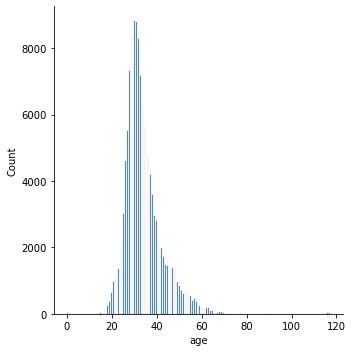

In [9]:
# Age distribution
sns.displot(dataset["age"])

####  Large Fraction of population seems to be around the ages of 25 to 35 years old

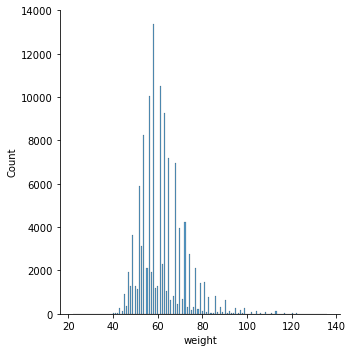

In [11]:
# Weight distribution
sns.displot(dataset["weight"])

Average weight = 50kg

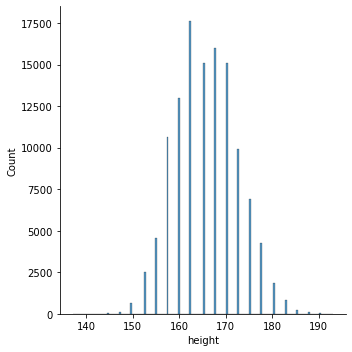

In [13]:
# height distribution
sns.displot(dataset["height"])

Average Height = 160 cm

In [16]:
# Removing Outliers
dfs = []
sizes = []
for size_type in dataset['size'].unique():
    sizes.append(size_type)
    ndf = dataset[['age','height','weight']][dataset['size'] == size_type]
    zscore = ((ndf - ndf.mean())/ndf.std())
    dfs.append(zscore)
    
for i in range(len(dfs)):
    dfs[i]['age'] = dfs[i]['age'][(dfs[i]['age']>-3) & (dfs[i]['age']<3)]
    dfs[i]['height'] = dfs[i]['height'][(dfs[i]['height']>-3) & (dfs[i]['height']<3)]
    dfs[i]['weight'] = dfs[i]['weight'][(dfs[i]['weight']>-3) & (dfs[i]['weight']<3)]

for i in range(len(sizes)):
    dfs[i]['size'] = sizes[i]
dataset = pd.concat(dfs)
dataset.head()

,age,height,weight,size
0,-0.833326,0.767729,-0.660757,XL
24,-0.713290,1.539527,1.556338,XL
25,-0.353183,-1.161765,-0.291241,XL
28,-0.473219,-1.933562,-1.399788,XL
34,0.126960,-0.775866,0.447791,XL


#### Filling Missing Values

In [18]:
# Check for missing values
dataset.isna().sum()

age       1678
height     547
weight    1069
size         0
dtype: int64

In [19]:
# Filling missing data
dataset["age"] = dataset["age"].fillna(dataset['age'].median())
dataset["height"] = dataset["height"].fillna(dataset['height'].median())
dataset["weight"] = dataset["weight"].fillna(dataset['weight'].median())

![ChessUrl](https://i.gifer.com/S0sh.gif "chess")

#### Feature Engineering

In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [24]:
# height --> mean()
dataset = dataset.fillna({"height": dataset["height"].mean()})
dataset.isnull().sum()

age       0
height    0
weight    0
size      0
dtype: int64

In [26]:
# features & target
features = dataset[["weight","height","age"]]
target = dataset['size']

In [27]:
# feature scaling
scaler = MinMaxScaler()
new_features = scaler.fit_transform(features)
new_features

array([[0.38808461, 0.63334439, 0.30624267],
       [0.7603833 , 0.76533639, 0.32797808],
       [0.45013439, 0.30336438, 0.39318432],
       ...,
       [0.58537365, 0.49314121, 0.37884174],
       [0.42081522, 0.49314121, 0.63349838],
       [0.84866715, 0.67751528, 0.32427246]])

In [28]:
# model & fit
x_train, x_test, y_train, y_test = train_test_split(new_features,target,random_state=123)

In [35]:
# Put models in a dictionary
models = {"Logistic Regression": LogisticRegression(),
         "KNN": KNeighborsClassifier(),
         "Random Forest": RandomForestClassifier(),
         "Decision Tree": DecisionTreeClassifier()}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
   
    """
   Fits and evaluates given machine learning models.
   models: a dict of different Scikit_Learn machine learning models
   X_train: training data (no labels)
   X_test: testing data (no labels)
   y_train: training labels
   y_test: test labels
   """ 
     # Set random seed
    np.random.seed(18)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit model to data
        model.fit(X_train, y_train)
        # Evaluate model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)

    return model_scores

In [36]:
y_pred = model.predict(x_test)
cr = classification_report(y_test,y_pred)
print("-------------------CLASSIFICATION REPORT--------------------")
print(cr)

-------------------CLASSIFICATION REPORT--------------------
              precision    recall  f1-score   support

           L       1.00      1.00      1.00      4501
           M       1.00      1.00      1.00      7281
           S       1.00      1.00      1.00      5436
          XL       1.00      1.00      1.00      4833
         XXL       0.92      0.92      0.92        12
         XXS       1.00      1.00      1.00      2453
        XXXL       1.00      1.00      1.00      5418

    accuracy                           1.00     29934
   macro avg       0.99      0.99      0.99     29934
weighted avg       1.00      1.00      1.00     29934



## The DecisionTreeClassifier model scored highest in initial tests with 99.9749% accuracy.